# CSC 578 NN&DL Spring, 2022
# Shreyas Ravi
## HW7: Image Classification using a CNN



This code is slightly modified from the TensorFlow tutorial [Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn) for the purpose of our homework. The code first downloads the data, the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) and partitions the training set into training and validation sets. Then the code builds a CNN network and trains the network with the training set. Finally the code evaluates the network performance using the validation set.

Note that there are **three places** in the code, indicated with **IMPORTANT**, where you have to choose the syntax that works for the version of TensorFlow (1 or 2) installed on your platform.


### Import Tensorflow
**IMPORTANT (1)**
Uncomment either import line(s) for the version of TensorFlow (TF1 or TF2) of your platform.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)  # check the TF version!

2.8.0


In [2]:
# For TF version 2 (just one line)
from tensorflow.keras import datasets, layers, models

# For TF version 1 (need both lines)
# from tensorflow import keras
# from keras import datasets, layers, models

### Download and prepare the CIFAR10 dataset¶

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is (pre-)divided into 50,000 training images and 10,000 testing images.


In [3]:
# Download the data from the repository site.
(train_all_images, train_all_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
# !! DO NOT REMOVE THIS LINE !!
# Delete test_labels (by making it an empty list) so that we don't accidentally
# use it in the code.
test_labels = []

# Then split the training set ('train_all') into two subsets: train and 
# validation.  After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by using stratefied sampling.  
train_images, valid_images, train_labels, valid_labels \
  = train_test_split(train_all_images, train_all_labels,
                     stratify=train_all_labels, test_size=0.2)


In [5]:
# Normalize pixel values of images to be between 0 and 1
train_images, valid_images, test_images \
  = train_images / 255.0, valid_images / 255.0, test_images / 255.0

In [24]:
train_images.shape

(40000, 32, 32, 3)

In [6]:
train_labels

array([[4],
       [7],
       [3],
       ...,
       [4],
       [3],
       [1]], dtype=uint8)

In [7]:
valid_labels

array([[3],
       [2],
       [7],
       ...,
       [9],
       [0],
       [8]], dtype=uint8)

### Verify the data
To verify that the dataset looks correct, plot the first 10 images from the training set and display the class name below each image.

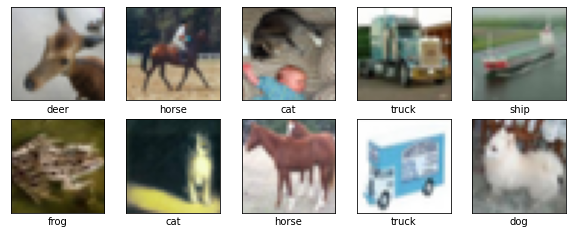

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create a convolutional network
As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size, where color_channels refers to (R,G,B). The format of CIFAR images is 32 * 32 pixels, so the input shape is (32, 32, 3). The output layer has 10 nodes, corresponding to the number of categories of the images.

In this code, the activation function of the output layer is specified to be softmax for the purpose of aligning the two versions of TensorFlow (TF1 and TF2; in particular to make TF2 compatible with TF1's 'sparse_categorical_crossentropy' loss function).

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(256, (4, 4), activation='relu', input_shape=(32, 32, 3), padding='same')) 
#filters changed from 32 to 64
# added strides =2 and padding = same = outcome @ epch 10 = 79%
#increasing size of layers, max cooling from 2, 2 to 3, 3 (caused error so max pooling changed baxk to 2,2)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu')) #filters changed from 64 to 128 and changed to 256
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, (3, 3), activation='relu')) #filters changed from 64 to 128 and changed to 256
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # As noted above


Verify the model

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 256)       12544     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 256)      0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 256)       590080    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 256)        0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 5, 5, 256)        

### Compile the model
**IMPORTANT (2)** Uncomment either loss function for the version of TensorFlow (TF1 or TF2) of your platform.

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # For TF2
              #loss='sparse_categorical_crossentropy', # For TF1
              metrics=['accuracy'])

# changed optimizer from adam to rmsprop and changed back

### Train the model

In [90]:
# epochs 50, batch_size 5000 = 1.18 log loss 
# epoch 10, batch_size removed, filter size 64 = final accuracy = 0.7888
#  epoch 10, filter size 64 and subsequent filer sizes changed to 128 = 

In [35]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=2000,
                    validation_data=(valid_images, valid_labels))

Epoch 1/50
20/20 [==============================] - 10s 455ms/step - loss: 2.1620 - accuracy: 0.2076 - val_loss: 2.0253 - val_accuracy: 0.2561
Epoch 2/50
20/20 [==============================] - 9s 452ms/step - loss: 1.8439 - accuracy: 0.3326 - val_loss: 1.6728 - val_accuracy: 0.3951
Epoch 3/50
20/20 [==============================] - 9s 463ms/step - loss: 1.5912 - accuracy: 0.4234 - val_loss: 1.4727 - val_accuracy: 0.4681
Epoch 4/50
20/20 [==============================] - 9s 460ms/step - loss: 1.4522 - accuracy: 0.4769 - val_loss: 1.3879 - val_accuracy: 0.5023
Epoch 5/50
20/20 [==============================] - 9s 476ms/step - loss: 1.3641 - accuracy: 0.5088 - val_loss: 1.2941 - val_accuracy: 0.5377
Epoch 6/50
20/20 [==============================] - 9s 444ms/step - loss: 1.3191 - accuracy: 0.5300 - val_loss: 1.3010 - val_accuracy: 0.5333
Epoch 7/50
20/20 [==============================] - 9s 468ms/step - loss: 1.2541 - accuracy: 0.5550 - val_loss: 1.2197 - val_accuracy: 0.5648
Epoch

### Evaluate the model
**IMPORTANT (3)** Uncomment either syntax for the version of TensorFlow (TF1 or TF2) of your platform.

313/313 - 2s - loss: 0.7254 - accuracy: 0.7559 - 2s/epoch - 5ms/step
valid_accuracy=0.7559000253677368, valid_loss=0.7254359126091003


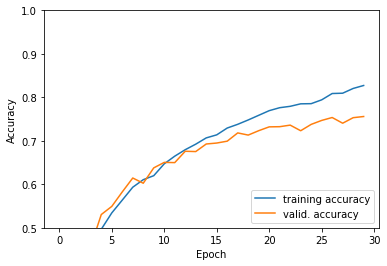

In [22]:
plt.plot(history.history['accuracy'], label='training accuracy') # For TF2
#plt.plot(history.history['acc'], label='training accuracy') # For TF1
plt.plot(history.history['val_accuracy'], label = 'valid. accuracy') # For TF2
#plt.plot(history.history['val_acc'], label = 'valid. accuracy') # For TF1
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the learned model with validation set
valid_loss, valid_acc = model.evaluate(valid_images, valid_labels, verbose=2) 
print ("valid_accuracy=%s, valid_loss=%s" % (valid_acc, valid_loss))

### TO DO (by you): Make Predictions
Apply the learned network to **'test_images'** and generate predictions.

Look at the code from HW#4 or other tutorial code for the syntax. You should generate predictions and create/write a KAGGLE submission file.

In [36]:
predictions = model.predict(test_images) #making predictions 

In [37]:
predictions

array([[2.5221671e-04, 5.5085600e-04, 8.2188912e-05, ..., 1.0549030e-04,
        7.1601578e-05, 6.7185597e-06],
       [1.2627637e-04, 3.6676469e-01, 2.2042892e-11, ..., 5.5129921e-11,
        6.3306743e-01, 4.1590130e-05],
       [5.7633888e-02, 2.7324802e-03, 1.3282780e-04, ..., 1.8129263e-04,
        9.3737656e-01, 1.7545072e-03],
       ...,
       [7.1928713e-10, 2.3318278e-10, 1.5938040e-05, ..., 6.7827386e-05,
        2.8557414e-09, 2.1563524e-11],
       [4.0554777e-02, 3.5218394e-01, 1.1247465e-04, ..., 3.1460249e-07,
        1.4835628e-04, 1.3777154e-05],
       [8.0731276e-08, 3.8021092e-08, 2.2172262e-06, ..., 9.9922991e-01,
        1.1661603e-09, 2.0494171e-09]], dtype=float32)

In [38]:
import pandas as pd
df = pd.DataFrame(data = predictions, columns=list(['cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9']))

In [39]:
df['id'] = list(range(1,10001))

In [40]:
df[['id','cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9']].to_csv('./predictions.csv',index=False)

In [11]:
from keras.wrappers.scikit_learn import KerasClassifier

In [12]:
from sklearn.model_selection import GridSearchCV

In [14]:
import numpy as np

In [15]:
"""def create_model(optimizer='rmsprop', init='glorot_uniform'):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))  # As noted above
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
  return model
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model)
#optimizers = ['rmsprop', 'adam']
#init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([50, 100, 150])
batches = np.array([5, 10, 20])
param_grid = dict(nb_epoch=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(train_images, train_labels)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for params, mean_score, scores in grid_result.grid_scores_:""
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/

ValueError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')